In [ ]:
from collections import Counter
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score

In [ ]:
#Hàm tính khoảng cách Euclidean giữa hai điểm.
def khoang_cach_euclidean(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))

In [ ]:
def duDoan(X_train, y_train, X_test, k):
    list_du_doan = []

    for x_test in X_test:
        list_khoang_cach = []

        for i, x_train in enumerate(X_train):
          #Tính khoảng cách từ điểm test đến điểm train
            khoang_cach = khoang_cach_euclidean(x_test, x_train)
            list_khoang_cach.append((khoang_cach, y_train[i]))

        #Sắp xếp các khoảng cách theo thứ tự tăng dần
        list_khoang_cach.sort(key=lambda x: x[0])

        #Lấy k láng giềng
        k_lang_gieng = list_khoang_cach[:k]

        list_nhan = []
        #Lấy nhãn từ k láng giềng
        for lg in k_lang_gieng:
          nhan = lg[1]
          list_nhan.append(nhan)

        #Đếm số lần xuất hiện của nhãn
        dem_nhan = Counter(list_nhan)
        #Lấy ra cặp dữ liệu xuất hiện nhiều nhất
        cap_pb = dem_nhan.most_common(1)[0]
        #Từ cặp dữ liệu trên, lấy ra nhãn phổ biến nhất
        nhan_pb = cap_pb[0]

        list_du_doan.append(nhan_pb)

    return np.array(list_du_doan)

In [ ]:
from google.colab import files
uploaded = files.upload()

In [ ]:
data = pd.read_csv("data.csv")
print("Kiểm tra dữ liệu:")
print(data.info())

Kiểm tra dữ liệu:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1421 entries, 0 to 1420
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Gender      1421 non-null   int64  
 1   Hemoglobin  1421 non-null   float64
 2   MCH         1421 non-null   float64
 3   MCHC        1421 non-null   float64
 4   MCV         1421 non-null   float64
 5   Result      1421 non-null   int64  
dtypes: float64(4), int64(2)
memory usage: 66.7 KB
None


In [ ]:
X = data.iloc[1:,:-1].values
print("\nDữ liệu của X: \n", X);

y = data.iloc[1:,-1].values
print("\nDữ liệu của y: \n", y)


Dữ liệu của X: 
 [[ 0.  15.9 25.4 28.3 72. ]
 [ 0.   9.  21.5 29.6 71.2]
 [ 0.  14.9 16.  31.4 87.5]
 ...
 [ 1.  13.1 17.7 28.1 80.7]
 [ 0.  14.3 16.2 29.5 95.2]
 [ 0.  11.8 21.2 28.4 98.1]]

Dữ liệu của y: 
 [0 1 0 ... 1 0 1]


In [ ]:
#Xử lý dữ liệu
chuyendoimin_max = preprocessing.MinMaxScaler()
X = chuyendoimin_max.fit_transform(X)
print(X)

[[0.         0.90291262 0.67142857 0.10638298 0.08074534]
 [0.         0.23300971 0.39285714 0.38297872 0.05590062]
 [0.         0.80582524 0.         0.76595745 0.5621118 ]
 ...
 [1.         0.63106796 0.12142857 0.06382979 0.35093168]
 [0.         0.74757282 0.01428571 0.36170213 0.80124224]
 [0.         0.50485437 0.37142857 0.12765957 0.89130435]]


In [ ]:
k = 10  #Số lượng láng giềng k
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=84)
list_du_doan = duDoan(X_train, y_train, X_test, k)
# print(list_du_doan)
print(list_du_doan)

[0 1 0 1 1 0 0 0 1 0 0 1 1 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 1 1 1 0 1 1 1
 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 1 1 0 1 1 0 1
 0 1 1 0 0 0 0 1 1 0 0 1 0 1 0 1 1 0 0 0 1 0 1 0 1 0 1 0 0 1 0 0 0 0 0 0 0
 0 0 1 0 1 1 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 1 1 1 1 0 1 0
 1 1 0 1 0 1 0 1 1 0 1 1 1 1 0 1 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 0 1 0 1 1 1
 0 0 0 0 0 0 1 0 0 0 1 0 1 0 1 0 0 0 0 1 0 0 1 0 1 1 0 0 0 0 0 1 0 0 1 0 0
 1 1 1 1 1 0 0 0 1 0 0 0 0 1 1 0 1 0 0 0 1 1 1 0 0 0 0 0 1 1 1 0 0 0 0 1 1
 1 0 0 1 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 1 0 1 0 1]


In [ ]:
cm = confusion_matrix(y_test, list_du_doan)
print("\nĐánh giá mô hình qua Confusion Matrix: \n", cm)
print(f"\nMô hình đã dự đoán đúng {cm[1][1]} trường hợp True Positive.")
print(f"Mô hình đã dự đoán đúng {cm[0][0]} trường hợp True Negative.")
print(f"Mô hình đã dự đoán sai {cm[0][1]} trường hợp False Positive.")
print(f"Mô hình đã dự đoán sai {cm[1][0]} trường hợp False Negative.")

print(f"\nĐộ chính xác: {accuracy_score(y_test, list_du_doan)*100:.2f}%")


Đánh giá mô hình qua Confusion Matrix: 
 [[169   3]
 [  2 110]]

Mô hình đã dự đoán đúng 110 trường hợp True Positive.
Mô hình đã dự đoán đúng 169 trường hợp True Negative.
Mô hình đã dự đoán sai 3 trường hợp False Positive.
Mô hình đã dự đoán sai 2 trường hợp False Negative.

Độ chính xác: 98.24%


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

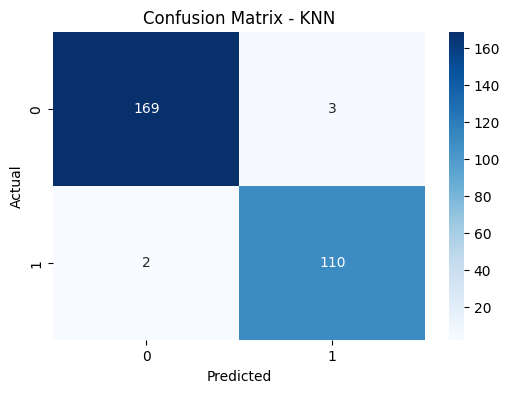

In [ ]:
# Biểu đồ heatmap cho Confusion Matrix KNN
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - KNN')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
with open("accuracy_knn.txt", "w") as f:
    f.write(str(accuracy_score(y_test, list_du_doan)))

In [ ]:
from google.colab import files
files.download("accuracy_knn.txt")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>